# Visualise Heat Diffusion Data over a 2D Grid
With help from https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a

G. Nervadof

## COLLECT DATA 

In [8]:
import torch
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import numpy as np

import sys

sys.path.insert(0, "./neural-processes")


from visualise import *
from visualise import Performance


dimensions = {
    't_dim' : 1,
    'y_dim' : 2500,
    'r_dim' : 500,
    'z_dim' : 500,
    'h_dim' : 500,
    'z_dim' : 500,
    'max_iter_time' : 69,
    'grid_size' : 50,
    'num_samples' : 45,
    'num_context' : 24,
    'num_target' : 24,
    'batch_size' : 2,
    'num_channels' : 512,
}

assert dimensions['grid_size']**2 == dimensions['y_dim']

# parameters
grid_size = dimensions['grid_size']
num_samples = dimensions['num_samples']
square_range = (5, 10)
temp_range = (1.7, 2.0)
diffusion_coef = 0.25 * dimensions['max_iter_time'] # upper limit for stable FDM solver

""" 
result in the following form
----------------------------
result -- list of length max_iter_time
element of result -- tuple size 3
tuple -- (target solution, predicted mean, predicted variance)
t, m, v are all 50x50 grids
"""

# result = torch.load("./results/result.pt")
# np_result = torch.load("./results/np_result.pt")
conv_result = torch.load("./results/conv_result.pt")

# result_noise = torch.load("./results/result_noise.pt")
# np_result_noise = torch.load("./results/np_result_noise.pt")
conv_result_noise = torch.load("./results/conv_result_noise.pt")

# loss = torch.load("./results/loss.pt")
# lupi_loss = torch.load("./results/epoch_loss_pi.pt")
epoch_loss_conv = torch.load("./results/epoch_loss_conv.pt")


# check data parameteres match result parameters
# assert len(result) == dimensions['max_iter_time']
# assert len(result[0]) == 3
# assert result[0][0].shape == (grid_size, grid_size)
# assert result[0][1].shape == (grid_size, grid_size)
# assert result[0][2].shape == (grid_size, grid_size)

# assert np_result[0][0].shape == (grid_size, grid_size)
# assert np_result[0][1].shape == (grid_size, grid_size)
# assert np_result[0][2].shape == (grid_size, grid_size)

assert conv_result[0][0].shape == (grid_size, grid_size)
assert conv_result[0][1].shape == (grid_size, grid_size)
assert conv_result[0][2].shape == (grid_size, grid_size)

# Metric 1: Mean Accuracy

#### To test how well the model performed, we can calculate the accuracy across the grid using MSE
#### Check that this metric is sensible and there hasn't been unfair normalisation


In [9]:
np_performance = Performance(
    result=np_result, max_iter_time=dimensions['max_iter_time'], grid_size=grid_size, num_samples=40
)
print(
    "VANILLA NP: mean accuracy was {:.5f}, with variance {:.5f}".format(
        np_performance.mean_accuracy, np_performance.var_accuracy
    )
)

performance = Performance(
    result=result, max_iter_time=dimensions['max_iter_time'], grid_size=grid_size, num_samples=40
)
print(
    "LUPI NP: mean accuracy was {:.5f}, with variance {:.5f}".format(
        performance.mean_accuracy, performance.var_accuracy
    )
)

conv_performance = Performance(
    result=conv_result, max_iter_time=dimensions['max_iter_time'], grid_size=grid_size, num_samples=40
)
print(
    "CONVOLUTION: mean accuracy was {:.5f}, with variance {:.5f}".format(
        conv_performance.mean_accuracy, performance.var_accuracy
    )
)

VANILLA NP: mean accuracy was 0.00212, with variance 0.00001
LUPI NP: mean accuracy was 0.00252, with variance 0.00001
CONVOLUTION: mean accuracy was 0.11081, with variance 0.00001


# Metric 2: Loss Curves


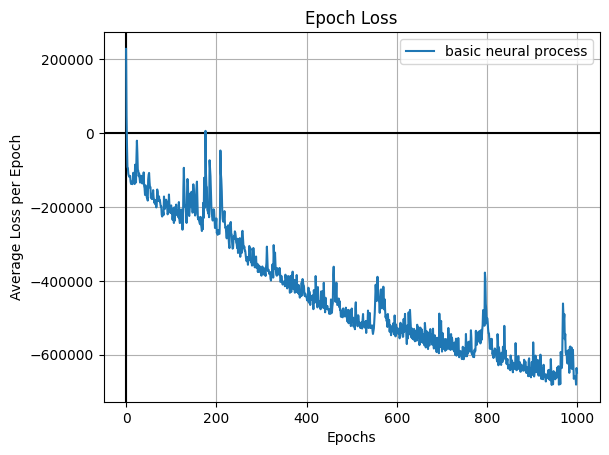

In [6]:
def plot_losses(loss, lupi_loss, conv_loss):
    fig = plt.figure()
    plt.axhline(color='black')
    plt.axvline(color='black')
    plt.title('Epoch Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Average Loss per Epoch')
    plt.plot(loss, label='basic NP', alpha=0.8)
    plt.plot(lupi_loss, label='LUPI NP', alpha=0.8)
    plt.plot(conv_loss, label='Convolutional Encoder NP', alpha=0.8)
    plt.legend()
    plt.grid()
    plt.show()

plot_losses(loss, lupi_loss, conv_loss)

## METRIC 3: ANIMATED GIF

## FLAT NP

MovieWriter ffmpeg unavailable; using Pillow instead.


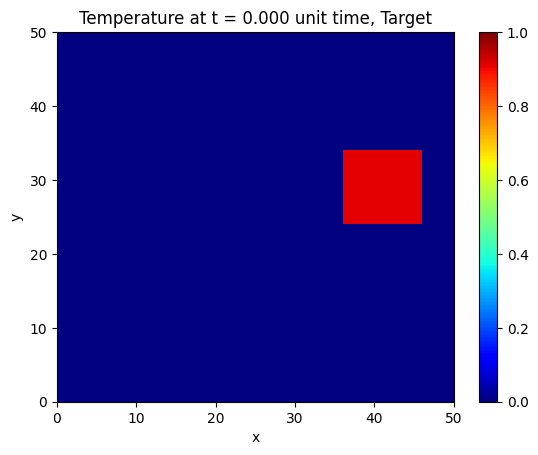

In [10]:
"""
SINGLE HEATMAP GIF
------------------

- target = True, variance = False gives the target solution 
- target = False, variance = True gives the variance in the prediction
- target = False, variance = False gives the mean of the prediction
"""

# Get the target to see what data looks like
plot_target = True
plot_solution = False
plot_variance = False


# clunky code result is globally defined, not input into animate func
def animate(k, max_iter_time: int, plot_target: bool, plot_solution: bool, plot_variance: bool):
    single_hm(result[k], k, max_iter_time, plot_target, plot_solution, plot_variance)


anim = animation.FuncAnimation(
    plt.figure(),
    animate,
    interval=1,
    frames=max_iter_time,
    repeat=False,
    fargs=(max_iter_time, plot_target, plot_solution, plot_variance)
)

if plot_target==True:
    anim.save("./animation_results/heat_equation_target.gif")
elif plot_solution==True:
    anim.save("./animation_results/heat_equation_solution.gif")
elif plot_variance==True:
    anim.save("./animation_results/heat_equation_variance.gif")
else:
    raise ValueError


## CONVOLUTIONAL NP 

MovieWriter ffmpeg unavailable; using Pillow instead.


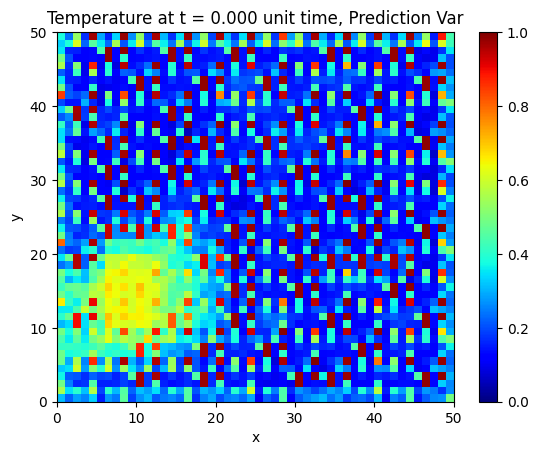

In [6]:
"""
SINGLE HEATMAP GIF
------------------

- target = True, variance = False gives the target solution 
- target = False, variance = True gives the variance in the prediction
- target = False, variance = False gives the mean of the prediction
"""
# decide which to plot
plot_target = False
plot_conv_solution = True
plot_conv_variance = False

# TODO: clunky code result is globally defined, not input into animate func
def animate(k, max_iter_time: int, plot_target: bool, plot_solution: bool, plot_variance: bool):
    single_hm(conv_result[k], k, max_iter_time, plot_target, plot_solution, plot_variance)

anim = animation.FuncAnimation(
    plt.figure(),
    animate,
    interval=1,
    frames=max_iter_time,
    repeat=False,
    fargs=(max_iter_time, False, plot_conv_solution, plot_conv_variance)
)

if plot_conv_solution==True:
    anim.save("./animation_results/conv_heat_equation_solution.gif")
elif plot_conv_variance==True:
    anim.save("./animation_results/conv_heat_equation_variance.gif")
else:
    raise ValueError


<Figure size 640x480 with 0 Axes>

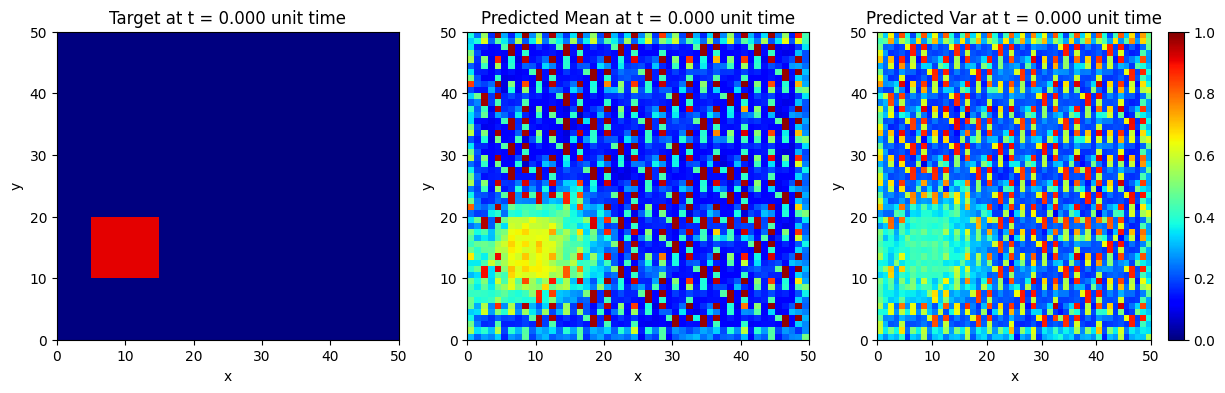

<Figure size 640x480 with 0 Axes>

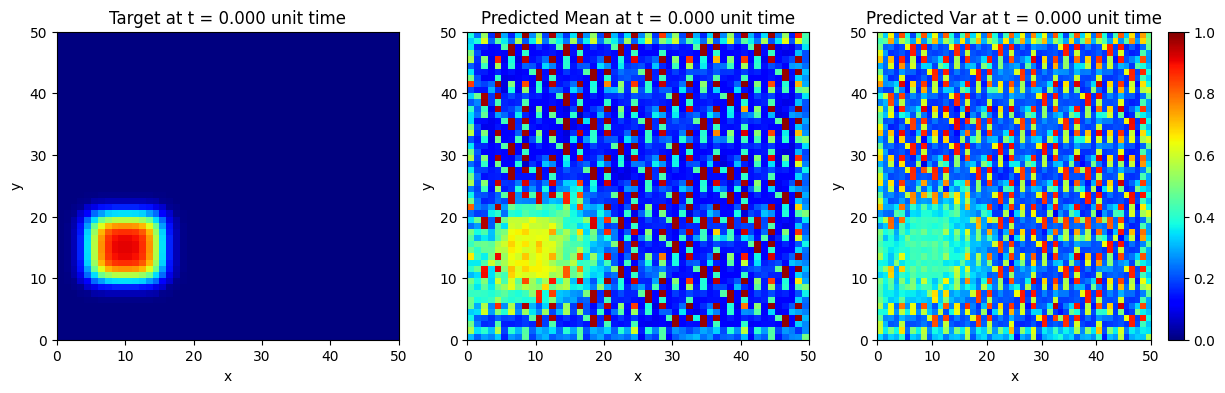

<Figure size 640x480 with 0 Axes>

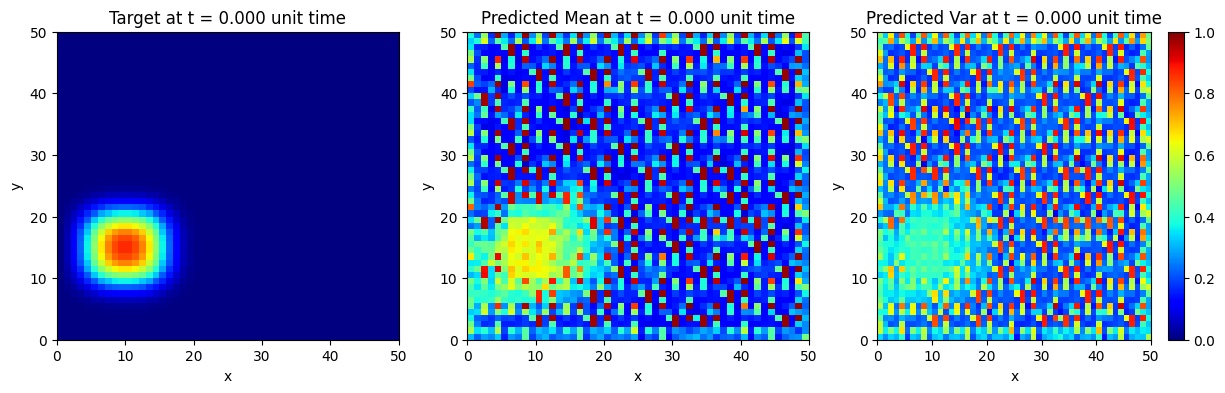

<Figure size 640x480 with 0 Axes>

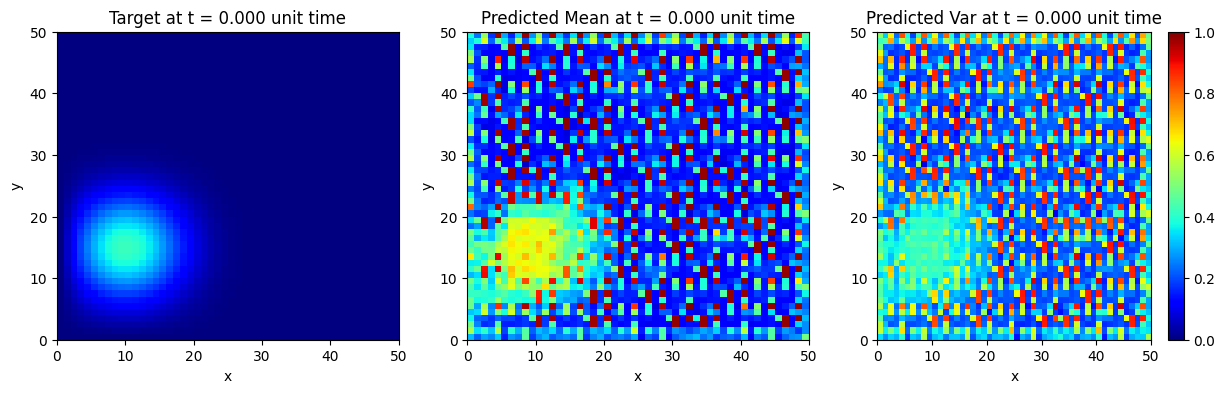

<Figure size 640x480 with 0 Axes>

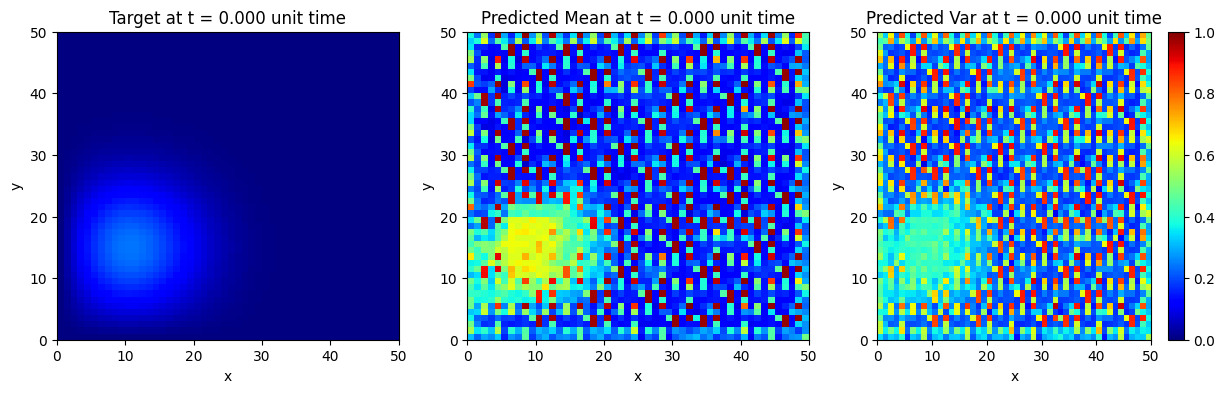

In [7]:
# plot heatmaps of target, solution and variance for following indices

idx = [0, 5, 10, 50, -2]

for id in idx:
    plotheatmap(conv_result[id], max_iter_time=max_iter_time)


## Fix the bug... GIF not working

In [ ]:
"""
GET ALL GIFS ON ONE FIGURE ANIMATED IN SYNC...
THIS IS NOT EASY :(
"""

fig, axes = plt.subplots(ncols=3, figsize=(15, 4))


def plotheatmap(result_k):
    """
    if ani==True, need to input fig and axes
    if ani==False, create fig, axes within function
    """

    k = 0

    # Clear the current plot figure
    plt.clf()
    ax1, ax2, ax3 = axes

    # plt.title(f"Temperature at t = {k * delta_t:.3f} unit time")
    ax1.set_title(f"Target at t = {k * 4 * np.pi / max_iter_time:.3f} unit time")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")

    ax2.set_title(
        f"Predicted Mean at t = {k * 4 * np.pi / max_iter_time:.3f} unit time"
    )
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")

    ax3.set_title(f"Predicted Var at t = {k * 4 * np.pi / max_iter_time:.3f} unit time")
    ax3.set_xlabel("x")
    ax3.set_ylabel("y")

    # This is to plot u_k (u at time-step k)
    im1 = ax1.pcolormesh(result_k[0], cmap=plt.cm.jet, vmin=-1.1, vmax=1.1)
    im2 = ax2.pcolormesh(result_k[1], cmap=plt.cm.jet, vmin=-1.1, vmax=1.1)
    im3 = ax3.pcolormesh(result_k[2], cmap=plt.cm.jet, vmin=-1.1, vmax=1.1)
    fig.colorbar(im1, ax=ax3)

    plt.show()
    return im1, im2, im3


def animate(k):
    plotheatmap(result[k])


def gen_results():
    for k in range(max_iter_time):
        yield result[k]


anim = animation.FuncAnimation(
    fig, animate, interval=1, frames=range(max_iter_time), repeat=False
)
# anim = animation.FuncAnimation(fig, plotheatmap, frames=gen_results, blit=True, repeat=False)
anim.save("harmonics_solution.gif")

# something wrong with this! Fix bug.